<a href="https://colab.research.google.com/github/rajeshaiml/machine-learning/blob/master/BreastCancerLinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Dataset

In [26]:
#Reducing comments as Im trying to practice and learn the concept
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [4]:
data=load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [7]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
data.data.shape

(569, 30)

In [10]:
S, F = data.data.shape #Samples, Features

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
data.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [19]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [20]:
X=data.data
y=data.target

In [22]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(381, 30)
(381,)
(188, 30)
(188,)


In [30]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(x_train)
X_test=Scaler.transform(x_test)

In [38]:
#Tensoflow model
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(F,)),
  tf.keras.layers.Dense(1,activation='sigmoid')
  ])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

r=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

print('Train Score: ',model.evaluate(X_train,y_train))
print('Test Score: ',model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5019 - accuracy: 0.7953 - val_loss: 0.5020 - val_accuracy: 0.8032
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8268 - val_loss: 0.4628 - val_accuracy: 0.8032
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8478 - val_loss: 0.4285 - val_accuracy: 0.8191
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8819 - val_loss: 0.3992 - val_accuracy: 0.8511
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8924 - val_loss: 0.3741 - val_accuracy: 0.8617
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8976 - val_loss: 0.3521 - val_accuracy: 0.8723
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.9055 - val_loss: 0.3324 - val_accuracy: 0.8936
Epoch 8/100


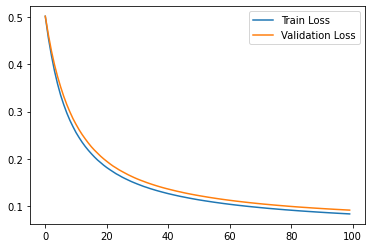

In [41]:
#Plot the loss
plt.plot(r.history['loss'],label='Train Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()

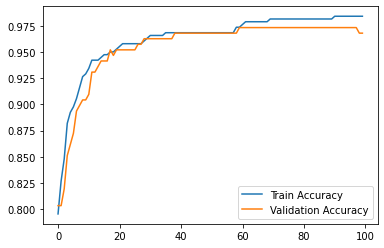

In [42]:
#Plot the accuracy
plt.plot(r.history['accuracy'],label='Train Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [48]:
#Pedictict
p=model.predict(X_test)
print(p.shape)
print(p)

(188, 1)
[[9.61603105e-01]
 [9.95868921e-01]
 [9.87691343e-01]
 [8.42007697e-01]
 [9.43507373e-01]
 [9.76411223e-01]
 [2.73345381e-01]
 [1.81794167e-04]
 [2.66884565e-02]
 [8.25349092e-01]
 [9.99788284e-01]
 [8.48520756e-01]
 [9.94785190e-01]
 [8.20925832e-03]
 [8.40708017e-02]
 [5.52296638e-03]
 [9.88053083e-01]
 [9.82847214e-01]
 [9.94505405e-01]
 [9.98941362e-01]
 [7.82455564e-01]
 [3.87596956e-05]
 [9.92907763e-01]
 [9.74140644e-01]
 [7.41247714e-01]
 [1.96394324e-03]
 [2.76952982e-04]
 [9.98121858e-01]
 [9.63517964e-01]
 [9.88727331e-01]
 [9.04375315e-03]
 [9.64926004e-01]
 [1.58956945e-02]
 [6.28915368e-05]
 [1.56842291e-01]
 [9.92481589e-01]
 [2.50498169e-06]
 [9.97372806e-01]
 [9.87265229e-01]
 [8.45862389e-01]
 [8.82819474e-01]
 [8.94806147e-01]
 [9.59510071e-09]
 [9.44847703e-01]
 [7.85591602e-02]
 [3.07058692e-01]
 [9.61622953e-01]
 [9.98404384e-01]
 [9.99284387e-01]
 [9.97396171e-01]
 [5.03882229e-01]
 [5.53795695e-03]
 [1.18658543e-02]
 [9.97756660e-01]
 [9.92100120e-01]
 

In [49]:
p=np.round(p).flatten()
print(p.shape)
print(p)

(188,)
[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]


In [50]:
#Save the model
model.save('BreastCancerLinearClassifier.h5')

In [55]:
!pwd

/content


In [51]:
!ls

BreastCancerLinearClassifier.h5  sample_data


In [54]:
model1=tf.keras.models.load_model('BreastCancerLinearClassifier.h5')
print(model1.layers)
print(model1.evaluate(X_train, y_train))

12/12 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9843
[0.0832829475402832, 0.9842519760131836]


In [57]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('BreastCancerLinearClassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>